In [20]:
#dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import os

In [2]:
#Cargar data limpia
path21 = '/home/ubuntu/projects/historical-analysis-management-tickets/data/processed/df2021.csv'
path22 = '/home/ubuntu/projects/historical-analysis-management-tickets/data/processed/df2022.csv'
path23 = '/home/ubuntu/projects/historical-analysis-management-tickets/data/processed/df2023.csv'
path24 = '/home/ubuntu/projects/historical-analysis-management-tickets/data/processed/df2024.csv'
path25 = '/home/ubuntu/projects/historical-analysis-management-tickets/data/processed/df2025.csv'

df2021 = pd.read_csv(path21, index_col=0)
df2022 = pd.read_csv(path22, index_col=0)
df2023 = pd.read_csv(path23, index_col=0)
df2024 = pd.read_csv(path24, index_col=0)
df2025 = pd.read_csv(path25, index_col=0)

#diccionario de apoyo
dict_df = {
    2021: df2021,
    2022: df2022,
    2023: df2023,
    2024: df2024,
    2025: df2025
}

In [21]:
#configuracion visual
plt.style.use('ggplot')
sns.set_context('notebook', font_scale=1.2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#cargar data
path = "/home/ubuntu/projects/historical-analysis-management-tickets/data/processed"
all_files = glob.glob(os.path.join(path, "df*.csv"))

df_list = []
for file in all_files:
    df = pd.read_csv(file, index_col=0)
    df_list.append(df)

df_all = pd.concat(df_list, axis=0, ignore_index=True)

#formato de fechas, al leer el csv se pierden
cols_fecha = ['ultima_modificacion', 'fecha_de_apertura', 'fecha_de_cierre', 'fecha_de_solucion']
for cols in cols_fecha:
    df_all[cols] = pd.to_datetime(df_all[cols], errors='coerce')

#col con format Period [M]
df_all['fecha_de_apertura_periodo_mes'] = df_all['fecha_de_apertura'].dt.to_period('M')

#ordenar cronologicamente por apertura
df_all = df_all.sort_values(by='fecha_de_apertura').reset_index(drop=True)

print("Dataframe cargado con éxito. Dimensiones:", df_all.shape)
print(f"Tickets disponibles: {df_all.shape[0]}")
print("Columnas disponibles:", df_all.columns.tolist())

Dataframe cargado con éxito. Dimensiones: (111619, 26)
Tickets disponibles: 111619
Columnas disponibles: ['id', 'titulo', 'estado', 'ultima_modificacion', 'fecha_de_apertura', 'prioridad', 'solicitante__solicitante', 'asignado_a__grupo_de_tecnicos', 'asignado_a__tecnico', 'categoria', 'origen_de_la_solicitud', 'ubicacion', 'seguimientos__origen_de_la_solicitud', 'fecha_de_cierre', 'fecha_de_solucion', 'cumple_SLA', 'fecha_de_apertura_dia', 'fecha_de_apertura_mes', 'fecha_de_apertura_año', 'fecha_de_apertura_hora', 'fecha_de_apertura_periodo_mes', 'creado_en_horario_laboral', 'area', 'servicio', 'tiempo_vida_horas', 'prioridad_num']


In [22]:
df_all.info()

<class 'pandas.DataFrame'>
RangeIndex: 111619 entries, 0 to 111618
Data columns (total 26 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   id                                    111619 non-null  int64         
 1   titulo                                111619 non-null  str           
 2   estado                                111619 non-null  str           
 3   ultima_modificacion                   111619 non-null  datetime64[us]
 4   fecha_de_apertura                     111619 non-null  datetime64[us]
 5   prioridad                             111619 non-null  str           
 6   solicitante__solicitante              110900 non-null  str           
 7   asignado_a__grupo_de_tecnicos         106145 non-null  str           
 8   asignado_a__tecnico                   101349 non-null  str           
 9   categoria                             102677 non-null  str           


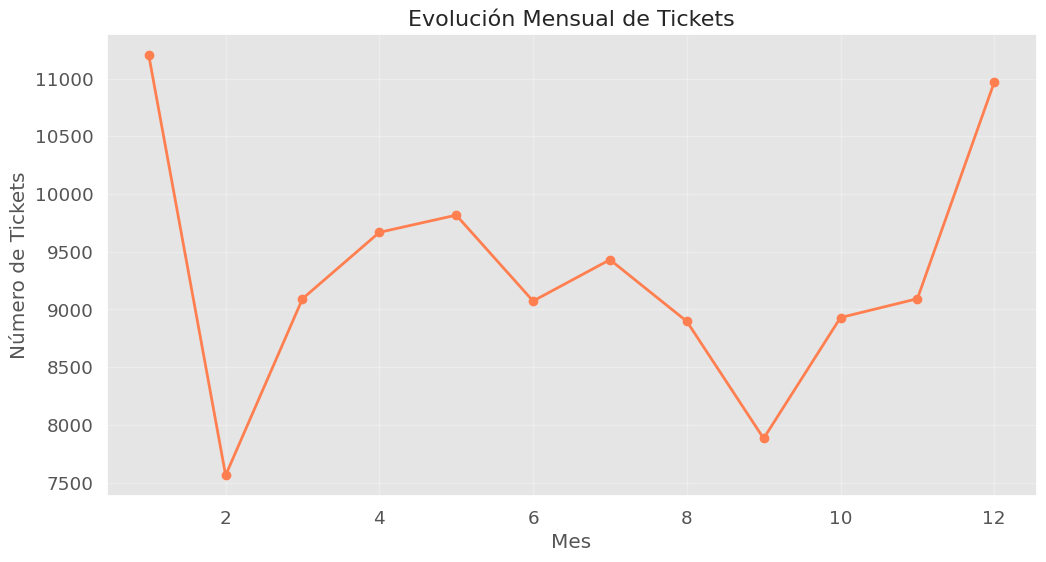

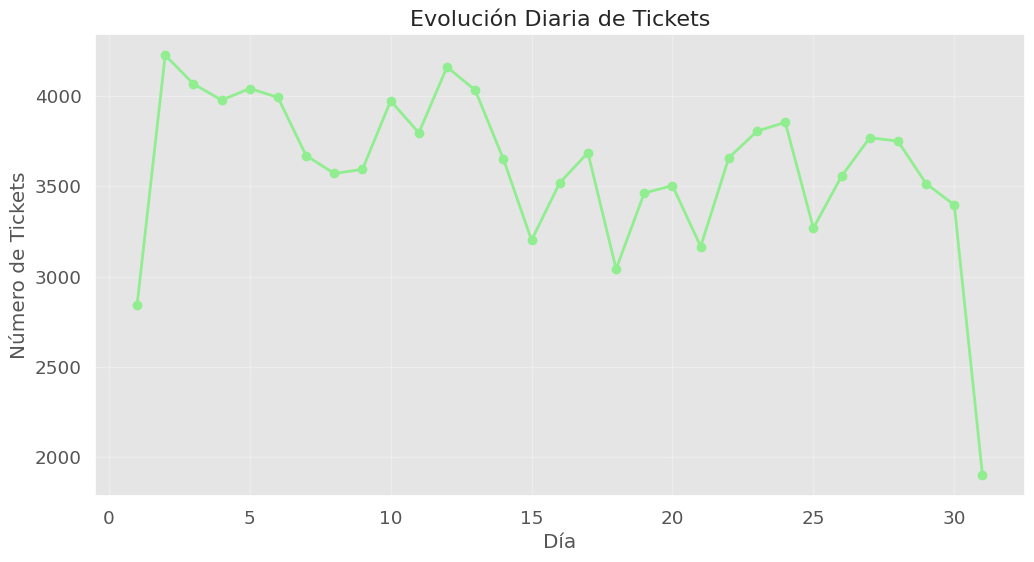

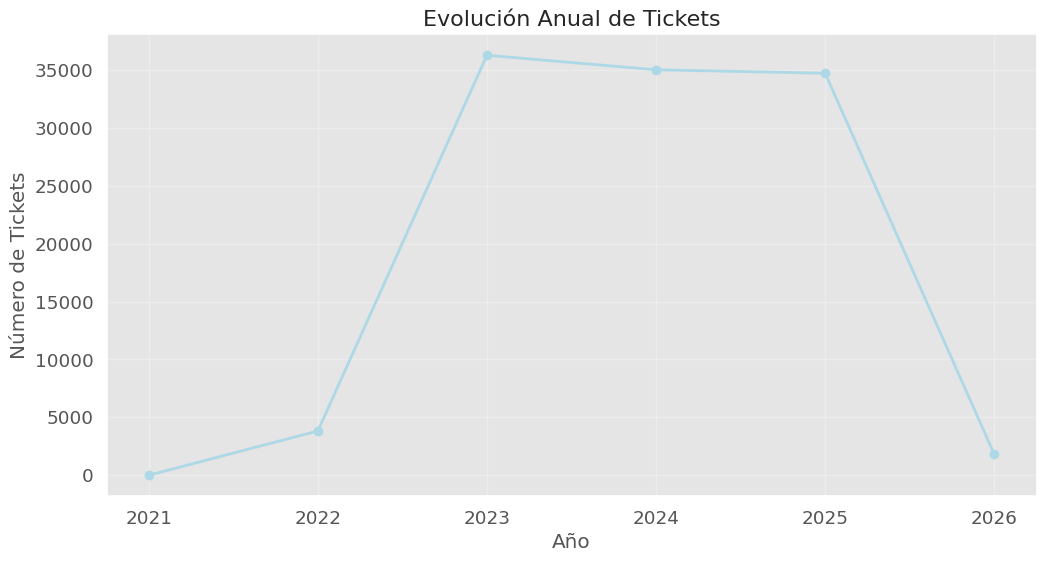

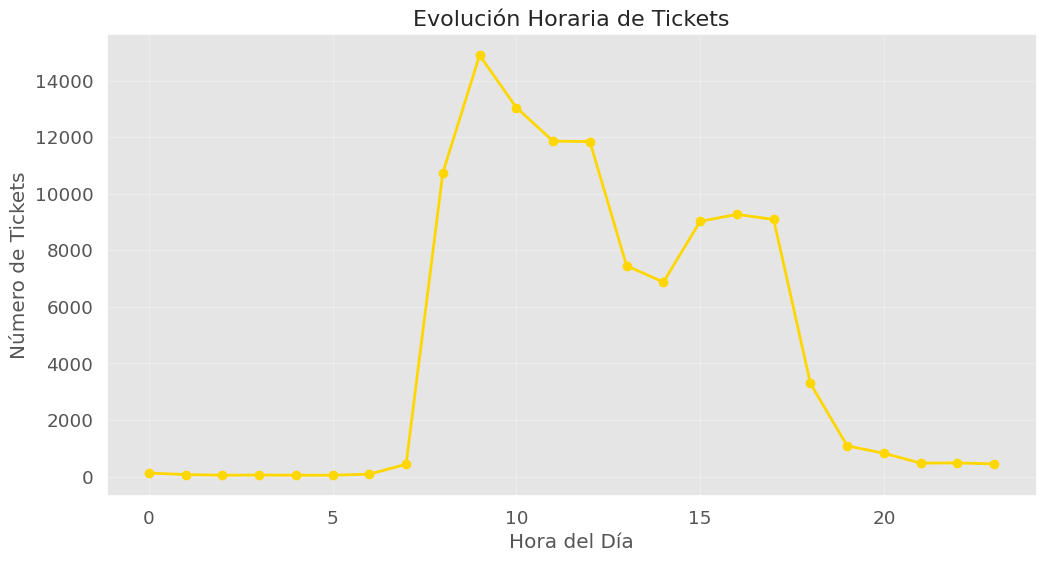

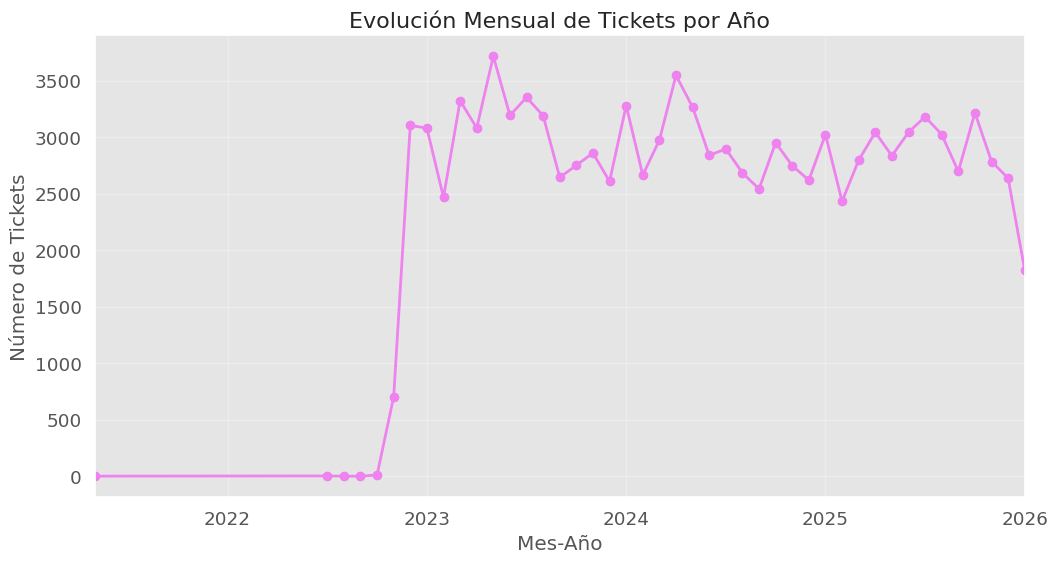

In [45]:
#evolucion temporal de tickets

#Funcion para plotear series temporales basicas
def plot_time_series(ticks, title, xlabel, ylabel, color="skyblue"):
    plt.Figure(figsize=(15, 6))
    ticks.plot(kind="line", marker="o", color=color, linewidth=2)
    plt.title(title, fontsize=16)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid(True, alpha=0.3)
    plt.show()

#data a utilizar
ticks_mensuales = df_all["fecha_de_apertura_mes"].value_counts().sort_index()
ticks_diario = df_all["fecha_de_apertura_dia"].value_counts().sort_index()
ticks_anual = df_all["fecha_de_apertura_año"].value_counts().sort_index()
ticks_horario = df_all["fecha_de_apertura_hora"].value_counts().sort_index()
ticks_anual_mes = df_all["fecha_de_apertura_periodo_mes"].value_counts().sort_index()

#ploteos
list_plots = [[ticks_mensuales, "Evolución Mensual de Tickets", "Mes", "Número de Tickets", "coral"], 
              [ticks_diario, "Evolución Diaria de Tickets", "Día", "Número de Tickets", "lightgreen"], 
              [ticks_anual, "Evolución Anual de Tickets", "Año", "Número de Tickets", "lightblue"], 
              [ticks_horario, "Evolución Horaria de Tickets", "Hora del Día", "Número de Tickets", "gold"], 
              [ticks_anual_mes, "Evolución Mensual de Tickets por Año", "Mes-Año", "Número de Tickets", "violet"]]
for plot in list_plots:
    plot_time_series(plot[0], plot[1], plot[2], plot[3], color=plot[4])

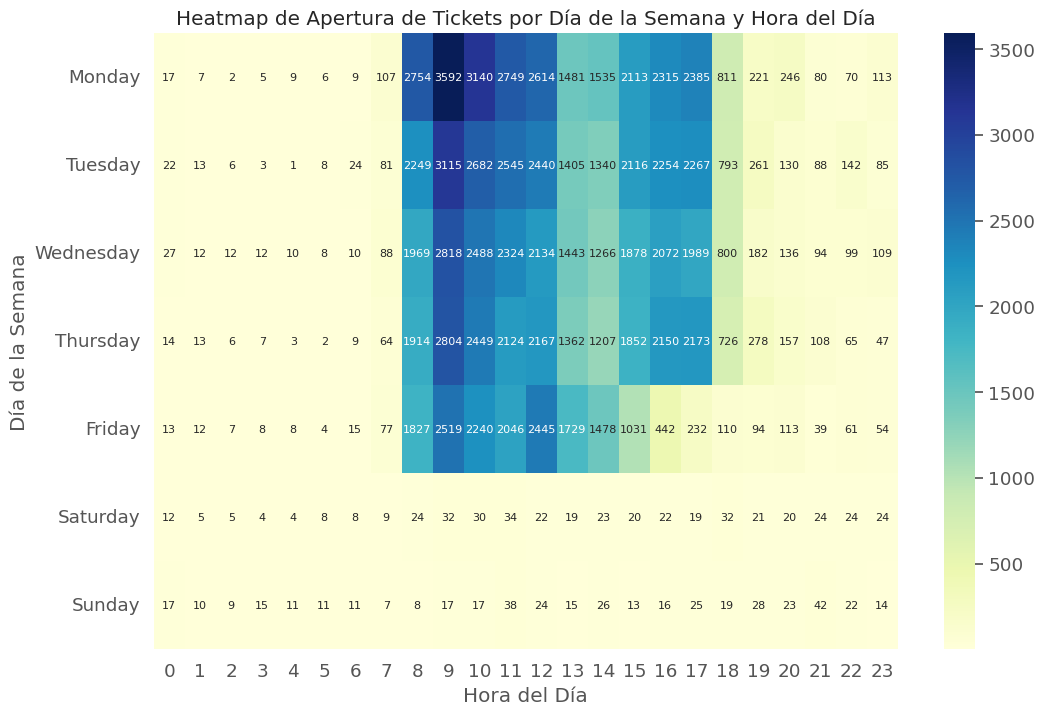

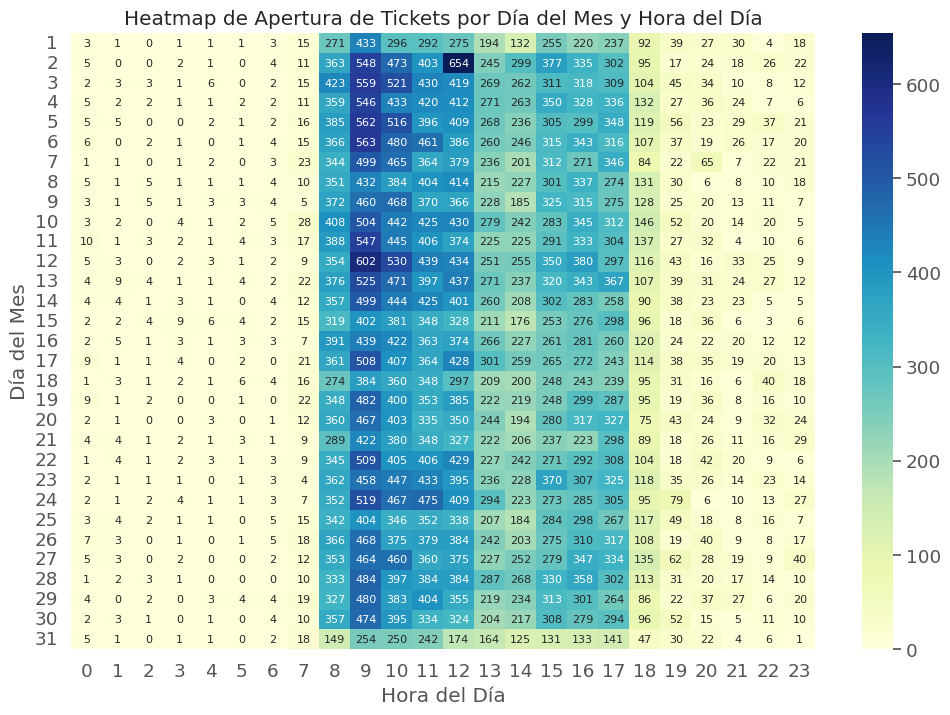

In [44]:
#heatmap
def plot_heatmap(pivot, title, xlabel, ylabel):
     plt.figure(figsize=(12, 8))
     sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".0f", annot_kws={"size":8})
     plt.title(title)
     plt.xlabel(xlabel)
     plt.ylabel(ylabel)
     plt.show()

#heatmap por DIA DE SEMANA vs HORA
df_all["weekday"] = df_all["fecha_de_apertura"].dt.day_name()
df_all["hour"] = df_all["fecha_de_apertura"].dt.hour

pivot_hora_dia = df_all.pivot_table(index='weekday', 
                                    columns='hour', 
                                    values='id', 
                                    aggfunc='count')
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_hora_dia = pivot_hora_dia.reindex(dias_orden)

#heatmap por DIA DE SEMANA MES vs HORA
pivot_hora_dia_mes = df_all.pivot_table(index='fecha_de_apertura_dia', 
                                    columns='hour', 
                                    values='id', 
                                    aggfunc='count',
                                    fill_value=0)

plot_heatmap(pivot_hora_dia, 
                 'Heatmap de Apertura de Tickets por Día de la Semana y Hora del Día', 
                 'Hora del Día', 
                 'Día de la Semana')

plot_heatmap(pivot_hora_dia_mes,
                 'Heatmap de Apertura de Tickets por Día del Mes y Hora del Día',
                 'Hora del Día',
                 'Día del Mes')

/tmp/ipykernel_250268/3640415625.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


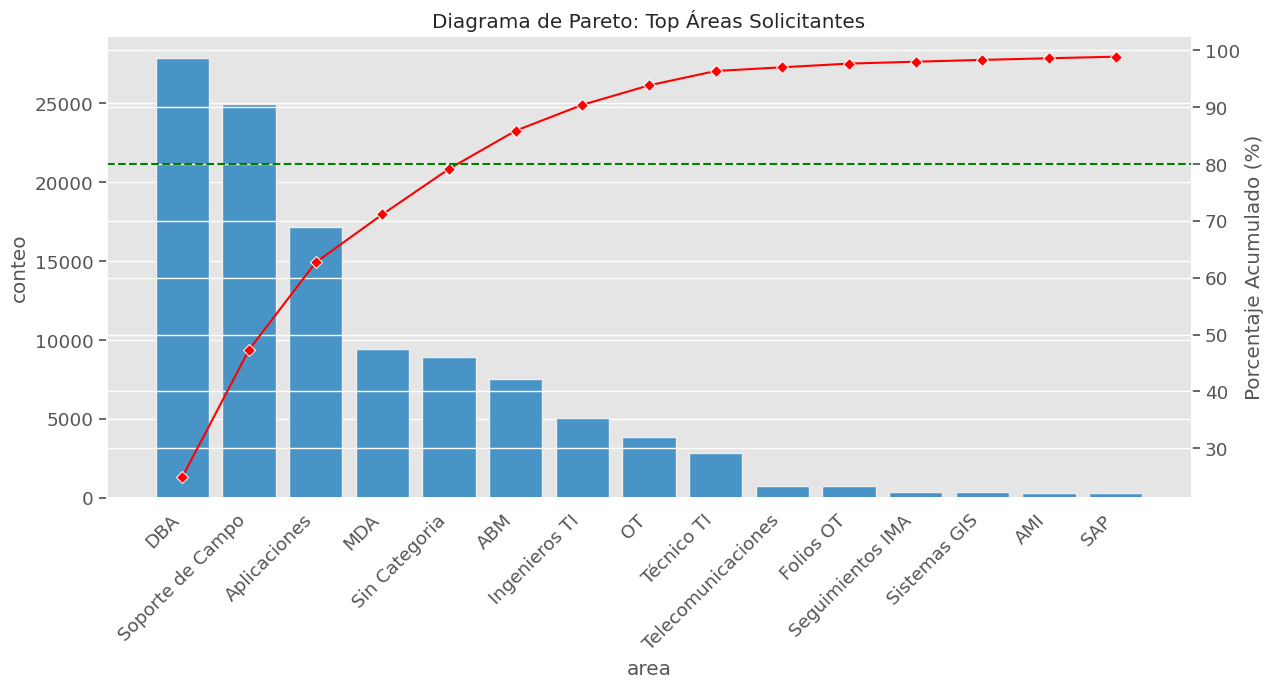

Top 5 Servicios más demandados:
servicio
General                30555
Query BD               17679
OSF                    13200
Revisión de Equipos     9132
Cambio Password         5348
Name: count, dtype: int64


In [47]:
# Analisis de Pareto
pareto_area = df_all['area'].value_counts().reset_index()
pareto_area.columns = ['area', 'conteo']
pareto_area['acumulado'] = pareto_area['conteo'].cumsum() / pareto_area['conteo'].sum() * 100

#grafico de Pareto
fig, ax1 = plt.subplots(figsize=(14, 6))

# Barras
sns.barplot(data=pareto_area.head(15), x='area', y='conteo', ax=ax1, color='#3498db')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Línea de acumulado
ax2 = ax1.twinx()
sns.lineplot(data=pareto_area.head(15), x='area', y='acumulado', ax=ax2, color='red', marker='D')
ax2.axhline(80, color='green', linestyle='--') # Línea del 80%
ax2.set_ylabel('Porcentaje Acumulado (%)')

plt.title('Diagrama de Pareto: Top Áreas Solicitantes')
plt.show()

# Top 5 Servicios Críticos
print("Top 5 Servicios más demandados:")
print(df_all['servicio'].value_counts().head(5))

/tmp/ipykernel_250268/481581204.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado_sla, x="prioridad", y="tiempo_vida_horas", palette="Set2")


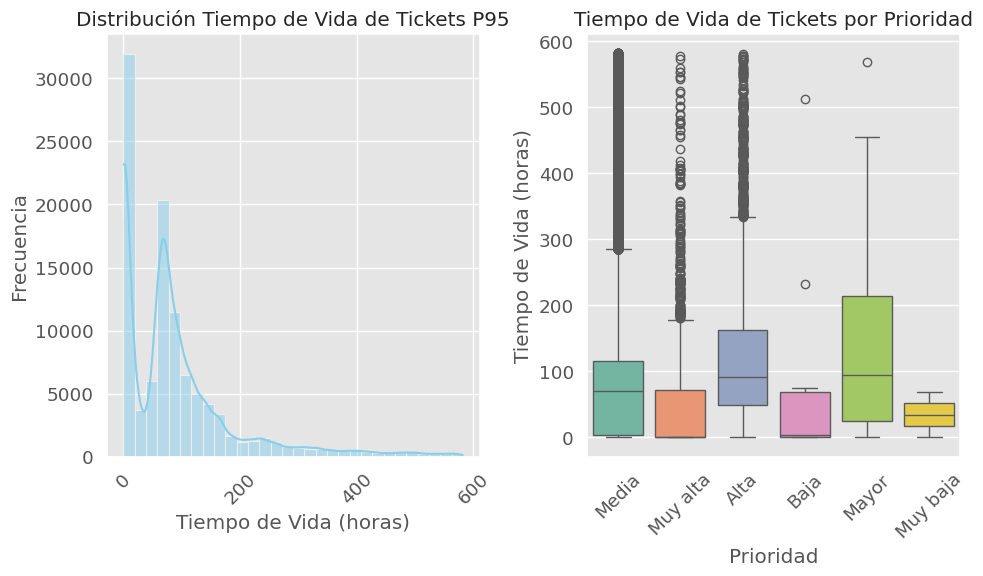

Tiempo Mediano de Resolución por Prioridad (Horas):
prioridad
Muy alta    0.95
Baja       58.60
Muy baja   68.60
Media      70.93
Alta       93.97
Mayor      98.70
Name: tiempo_vida_horas, dtype: float64


In [59]:
#SLA
q95 = df_all["tiempo_vida_horas"].quantile(0.95)
df_filtrado_sla = df_all[df_all["tiempo_vida_horas"] < q95]

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.histplot(df_filtrado_sla["tiempo_vida_horas"], bins=30, kde=30, color='skyblue')
plt.title('Distribución Tiempo de Vida de Tickets P95')
plt.xlabel('Tiempo de Vida (horas)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data=df_filtrado_sla, x="prioridad", y="tiempo_vida_horas", palette="Set2")
plt.title('Tiempo de Vida de Tickets por Prioridad')
plt.xlabel('Prioridad')
plt.ylabel('Tiempo de Vida (horas)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Tiempo Mediano de Resolución por Prioridad (Horas):")
print(df_all.groupby('prioridad')['tiempo_vida_horas'].median().sort_values())

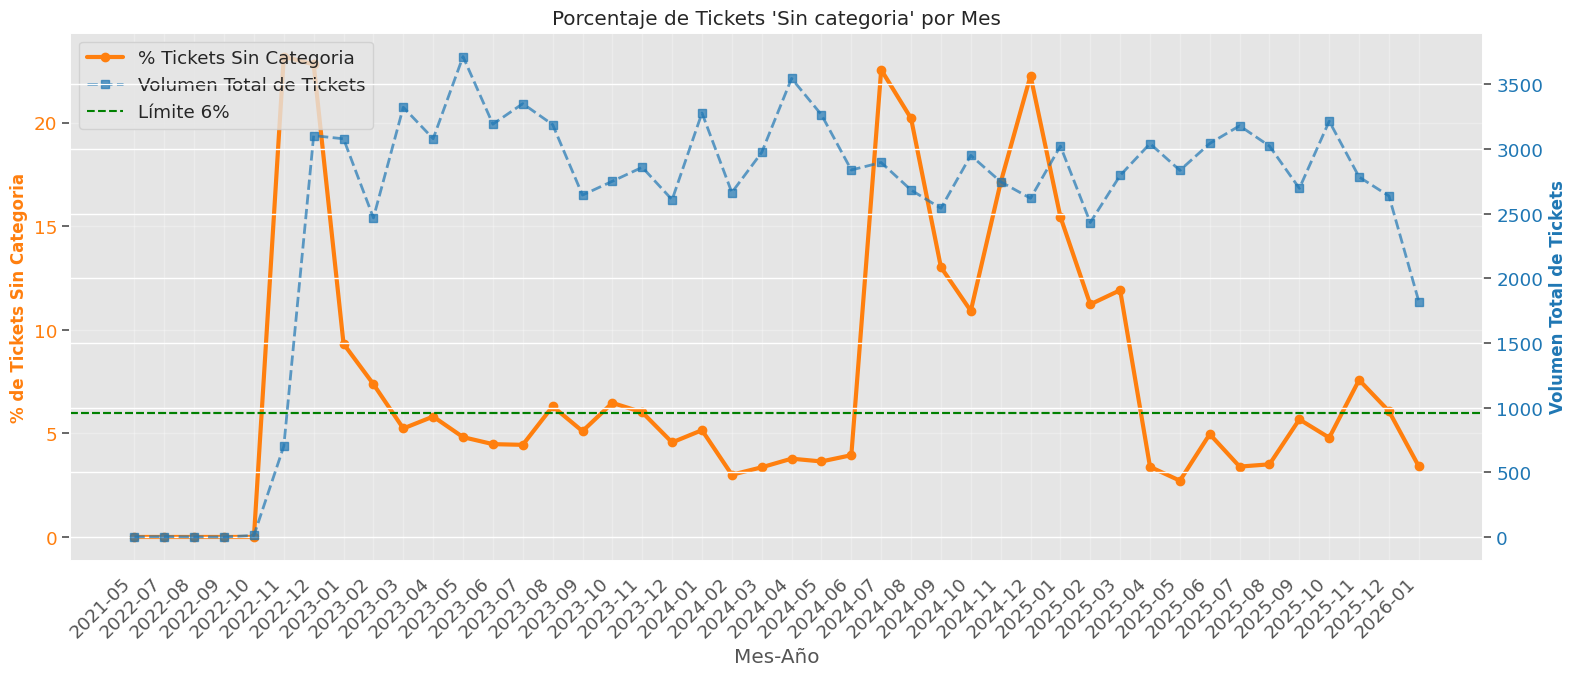

Coeficiente de Correlación (Volumen vs % Sin Categoría): 0.21


In [74]:
# Analisis de Tickets 'Sin categoria' a lo largo del tiempo respecto al volumen total de tickets

df_sin_cat = df_all[df_all["area"] == "Sin Categoria"]
df_con_cat = df_all[df_all["area"] != "Sin categoria"]

conteo_mensual_total = df_all.groupby('fecha_de_apertura_periodo_mes')["id"].count()
conteo_mensual_sincat = df_sin_cat.groupby('fecha_de_apertura_periodo_mes')["id"].count()

pct_sincat = (conteo_mensual_sincat / conteo_mensual_total * 100).fillna(0)

eje_x = pct_sincat.index.astype(str)

fig, ax1 = plt.subplots(figsize=(16, 7))

#eje izq % de tickets sin categoria
color = 'tab:orange'
ax1.set_xlabel('Mes-Año')
ax1.set_ylabel('% de Tickets Sin Categoria', color=color, fontsize=12, fontweight='bold')
linea1 = ax1.plot(eje_x, pct_sincat, color=color, marker='o', linewidth=3, label='% Tickets Sin Categoria')
linea_umbral = ax1.axhline(y=6, color='green', linestyle='--', linewidth=1.5, label='Límite 6%')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=6, color='green', linestyle='--', linewidth=1.5, label='Límite 6%')

#eje Der Volumen de tickets
ax2 = ax1.twinx()
color_vol = 'tab:blue'
ax2.set_ylabel('Volumen Total de Tickets', color=color_vol, fontsize=12, fontweight='bold')
linea2 = ax2.plot(eje_x, conteo_mensual_total, 
                  color=color_vol, 
                  marker='s', 
                  linestyle="--",
                  label='Volumen Total de Tickets', 
                  alpha=0.7, 
                  linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_vol)

plt.title("Porcentaje de Tickets 'Sin categoria' por Mes")
lineas = linea1 +linea2 + [linea_umbral]
etiquetas = [l.get_label() for l in lineas]
ax1.legend(lineas, etiquetas, loc='upper left')

plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

#correlacion
correlacion = pct_sincat.corr(conteo_mensual_total)
print(f"Coeficiente de Correlación (Volumen vs % Sin Categoría): {correlacion:.2f}")

/tmp/ipykernel_250268/3060868193.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comparativo, x="clasificacion", y="tiempo_vida_horas", palette=["#e74c3c", "#2ecc71"])


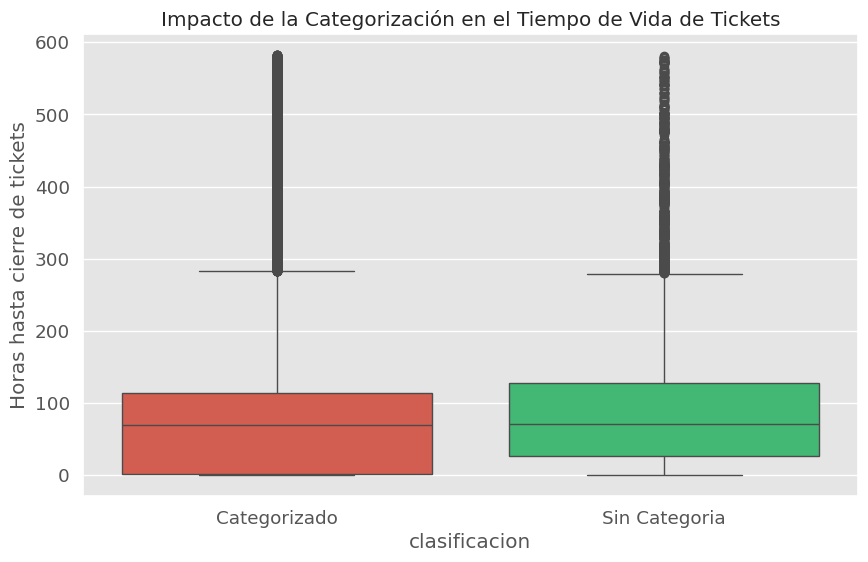

/tmp/ipykernel_250268/3060868193.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_origenes.values, x=top_origenes.index, palette="viridis")


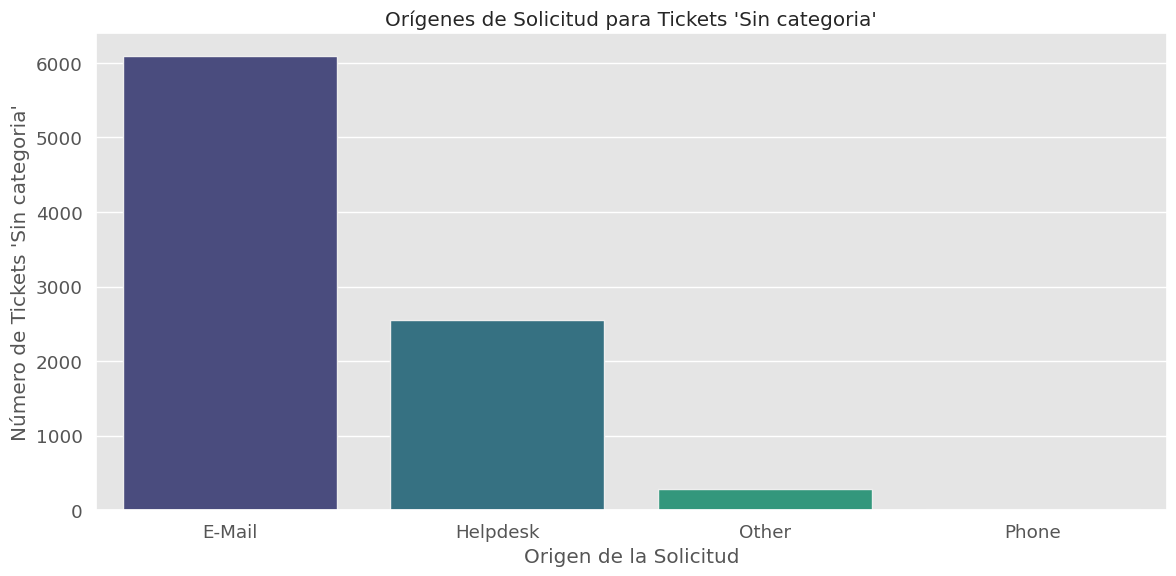

In [84]:
#Boxplot  impacto de tiempos de No Categorizar tickets
df_comparativo = df_all[df_all["tiempo_vida_horas"] < q95].copy()
df_comparativo["clasificacion"] = df_comparativo["area"].apply(
    lambda x: "Sin Categoria" if x == "Sin Categoria" else "Categorizado")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_comparativo, x="clasificacion", y="tiempo_vida_horas", palette=["#e74c3c", "#2ecc71"])
plt.title('Impacto de la Categorización en el Tiempo de Vida de Tickets')
plt.ylabel("Horas hasta cierre de tickets")
plt.show()

#Que origen tienen los tickets sin categoria
col_origen = [c for c in df_all.columns if 'origen_de_la_solicitud' in c.lower()]
if col_origen:
    col = col_origen[0] # Usamos la primera coincidencia
    top_origenes = df_sin_cat[col].value_counts().head(10)
    
    sns.barplot(y=top_origenes.values, x=top_origenes.index, palette="viridis")
    plt.title("Orígenes de Solicitud para Tickets 'Sin categoria'")
    plt.ylabel("Número de Tickets 'Sin categoria'")
    plt.xlabel("Origen de la Solicitud")
    plt.tight_layout()
    plt.show()

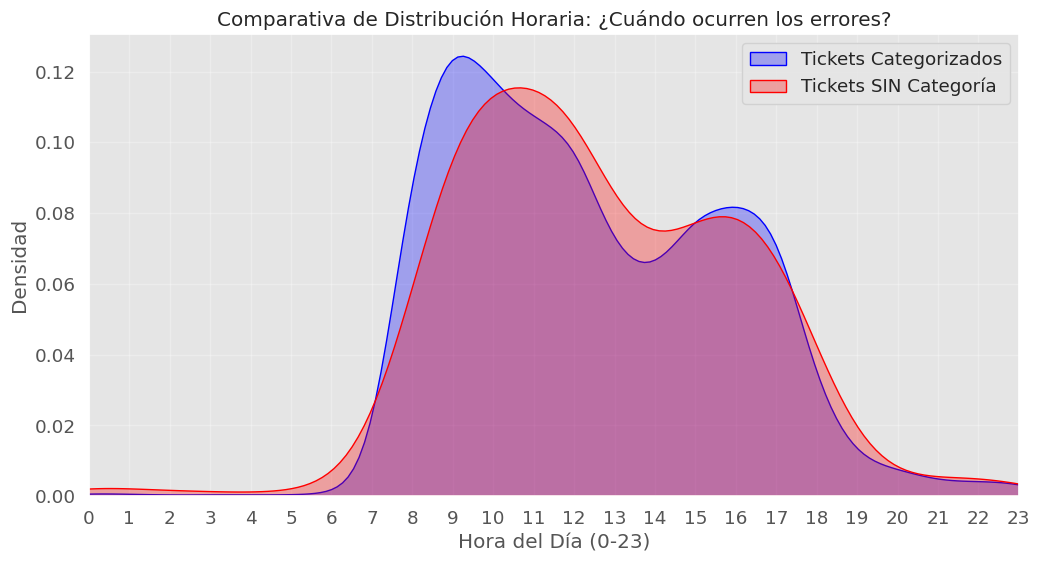

In [86]:
#Analisis  correlacion de ticket sin categoria con algun horario en especifico

df_all["es_sin_categoria"] = df_all["area"] == "Sin Categoria"

sns.kdeplot(data=df_all[df_all['es_sin_categoria']==False],x="fecha_de_apertura_hora",
            label='Tickets Categorizados', fill=True, alpha=0.3, color='blue', bw_adjust=2)
sns.kdeplot(data=df_all[df_all['es_sin_categoria']==True], x="fecha_de_apertura_hora",
            label='Tickets SIN Categoría', fill=True, alpha=0.3, color='red', bw_adjust=2)

plt.title('Comparativa de Distribución Horaria: ¿Cuándo ocurren los errores?')
plt.xlabel('Hora del Día (0-23)')
plt.ylabel('Densidad')
plt.xlim(0, 23)
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


--- ANÁLISIS DE PARETO: AÑO 2024 ---
Total de Tickets: 35004


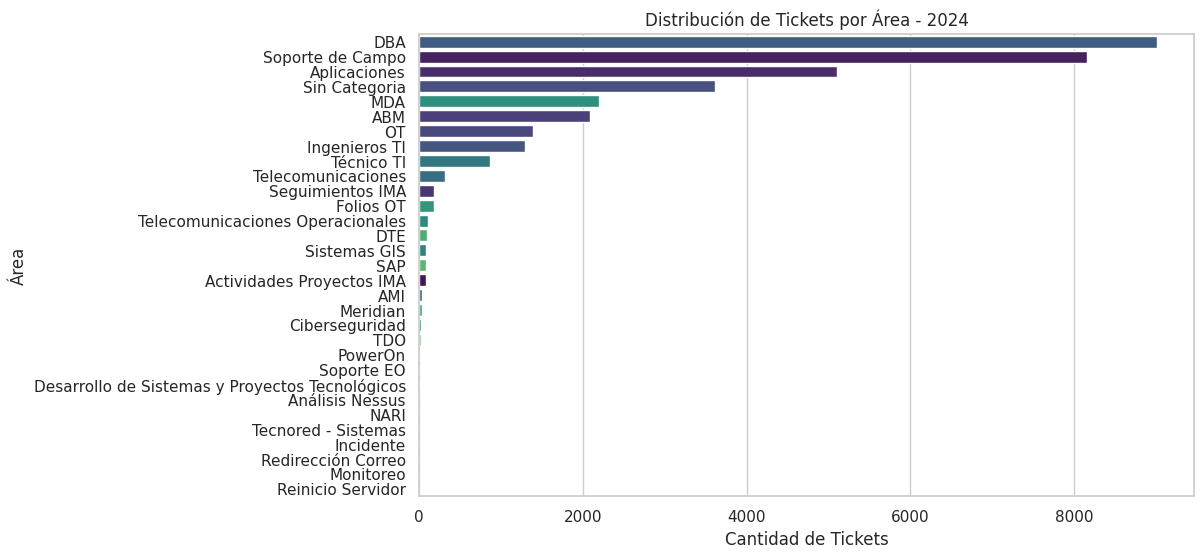

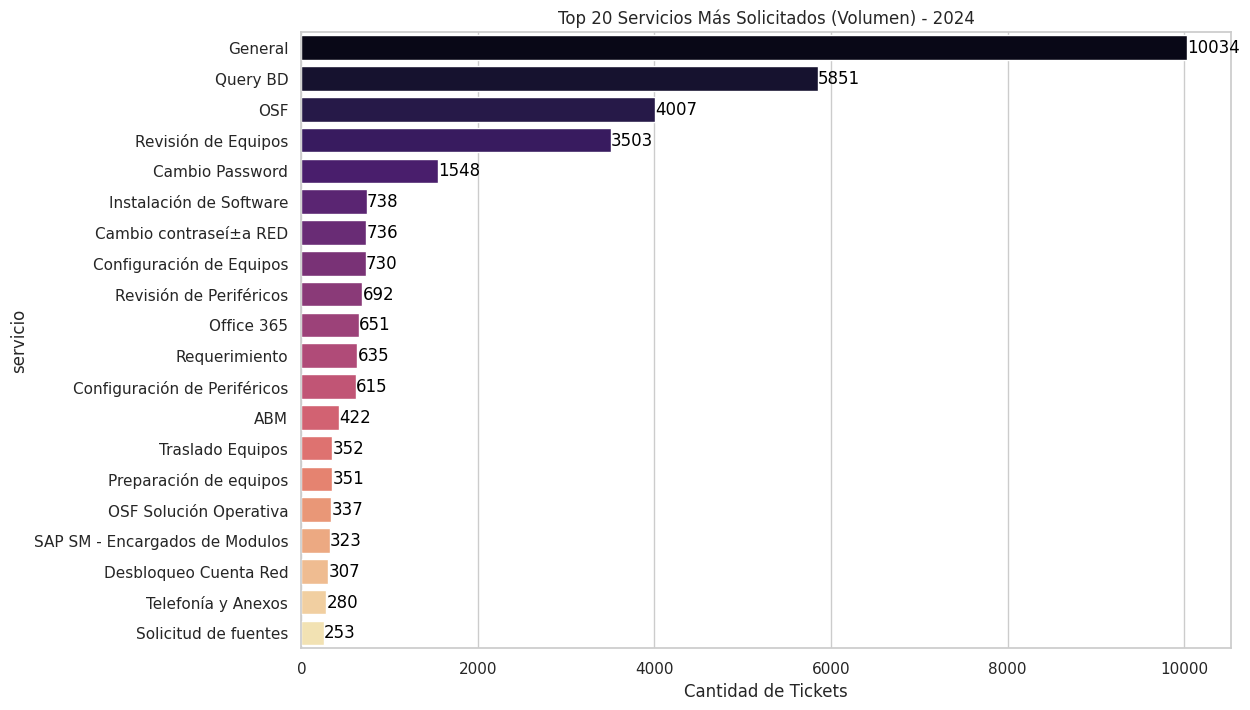

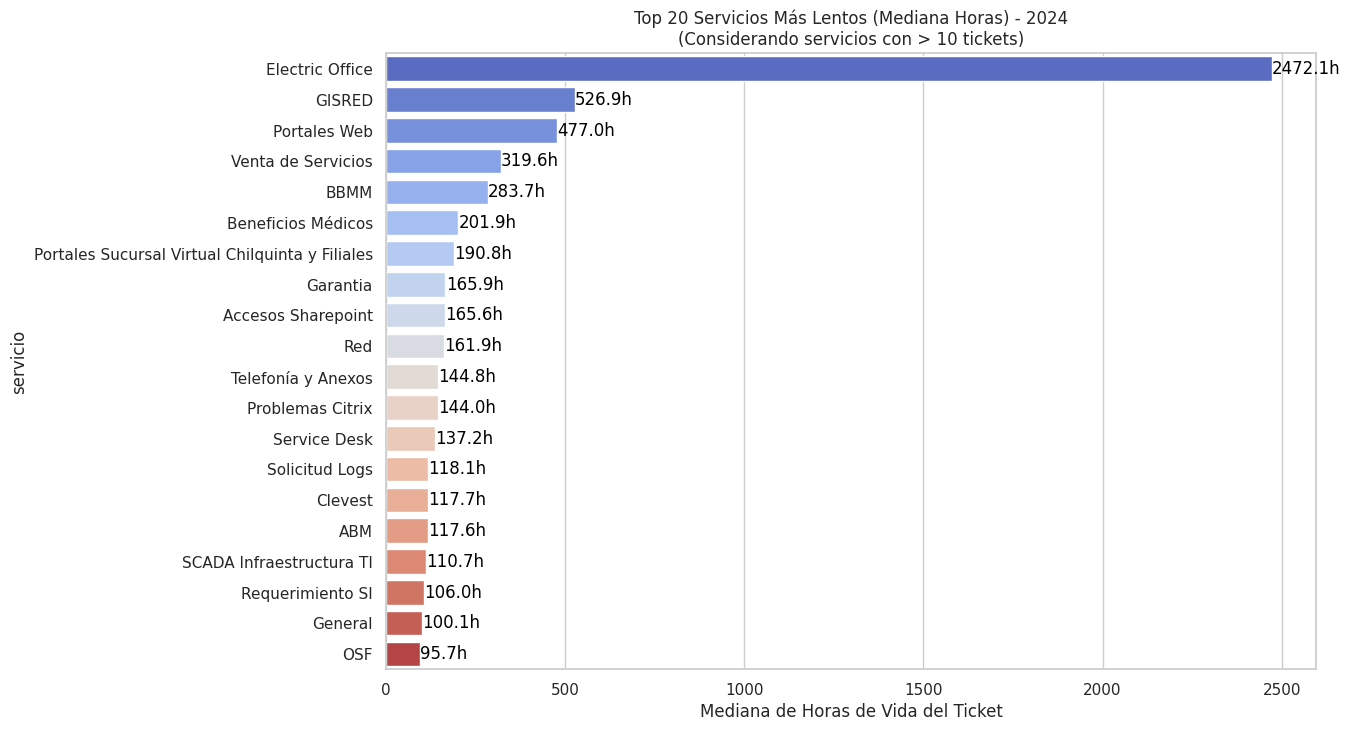

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética para gráficos profesionales
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

def analizar_top_servicios(df, year, top_n=15):
    print(f"--- ANÁLISIS DE PARETO: AÑO {year} ---")
    print(f"Total de Tickets: {len(df)}")
    
    # 1. VISIÓN ESTRATÉGICA: Volumen por Área
    # ------------------------------------------------------
    plt.figure(figsize=(10, 6))
    order_area = df['area'].value_counts().index
    ax1 = sns.countplot(y='area', data=df, order=order_area, palette='viridis', hue='area', legend=False)
    ax1.set_title(f'Distribución de Tickets por Área - {year}')
    ax1.set_xlabel('Cantidad de Tickets')
    ax1.set_ylabel('Área')
    plt.show()

    # 2. VISIÓN OPERATIVA: Top Servicios por Volumen (Los más frecuentes)
    # ------------------------------------------------------
    # Filtramos "General" si quieres ver solo específicos, o lo dejamos para ver si falta categorizar
    top_servicios_vol = df['servicio'].value_counts().nlargest(top_n)
    
    plt.figure(figsize=(12, 8))
    ax2 = sns.barplot(x=top_servicios_vol.values, y=top_servicios_vol.index, palette='magma', hue=top_servicios_vol.index, legend=False)
    ax2.set_title(f'Top {top_n} Servicios Más Solicitados (Volumen) - {year}')
    ax2.set_xlabel('Cantidad de Tickets')
    
    # Añadir etiquetas de valor
    for i, v in enumerate(top_servicios_vol.values):
        ax2.text(v + 3, i, str(v), color='black', va='center')
    plt.show()
    
    # 3. VISIÓN DE EFICIENCIA: Top Servicios por Tiempo de Resolución (Los más lentos)
    # ------------------------------------------------------
    # Calculamos la mediana (más robusta que el promedio ante outliers extremos)
    # Filtramos servicios con pocos tickets (ej. < 10) para no distorsionar con casos únicos
    conteo_servicios = df['servicio'].value_counts()
    servicios_relevantes = conteo_servicios[conteo_servicios > 10].index
    
    df_relevante = df[df['servicio'].isin(servicios_relevantes)]
    
    top_servicios_time = df_relevante.groupby('servicio')['tiempo_vida_horas'].median().nlargest(top_n)
    
    plt.figure(figsize=(12, 8))
    ax3 = sns.barplot(x=top_servicios_time.values, y=top_servicios_time.index, palette='coolwarm', hue=top_servicios_time.index, legend=False)
    ax3.set_title(f'Top {top_n} Servicios Más Lentos (Mediana Horas) - {year}\n(Considerando servicios con > 10 tickets)')
    ax3.set_xlabel('Mediana de Horas de Vida del Ticket')
    
    # Añadir etiquetas
    for i, v in enumerate(top_servicios_time.values):
        ax3.text(v + 0.5, i, f"{v:.1f}h", color='black', va='center')
    plt.show()

# --- EJECUTAR EL ANÁLISIS ---
# Recomendación: Analiza el último año completo (2024 o 2025) para ver la situación actual
# Si df2025 está cargado en dict_df:
analizar_top_servicios(dict_df[2024], 2024, top_n=20)